# **Face and Eye Detection with Haar Cascade Classifiers**

In [1]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

def imshow(title='Image', image=None, size=10):
    w, h = image.shape[0], image.shape[1]
    ratio = w/h
    plt.figure(figsize=(ratio * size, size))
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.title(title)
    plt.axis('off')
    plt.show()

# Face Detection

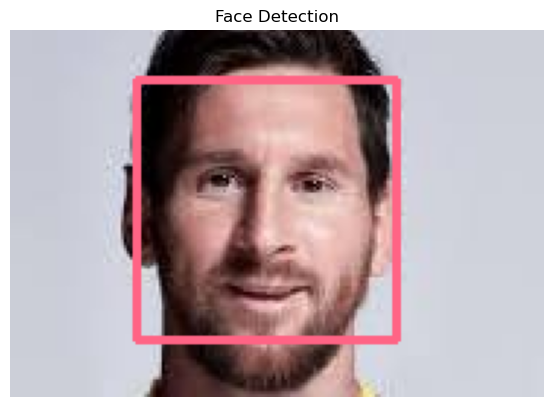

In [18]:
image = cv2.imread('messi.jpg') # grayscaled
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

detect_face = cv2.CascadeClassifier('haarcascades\Haarcascades\haarcascade_frontalface_default.xml') 

# Our classifier returns the ROI of the detected face as a tuple
# It stores the top left coordinate and the bottom right coordiantes
faces = detect_face.detectMultiScale(gray, 1.3, 5)

if len(faces) == 0:
    print('No faces found')

# We iterate through our faces array and draw a rectangle
# over each face in faces

for (x, y, w, h) in faces:
    cv2.rectangle(image, (x, y), (x+w, y+h), (133, 100, 255), 2)
    imshow('Face Detection', image)

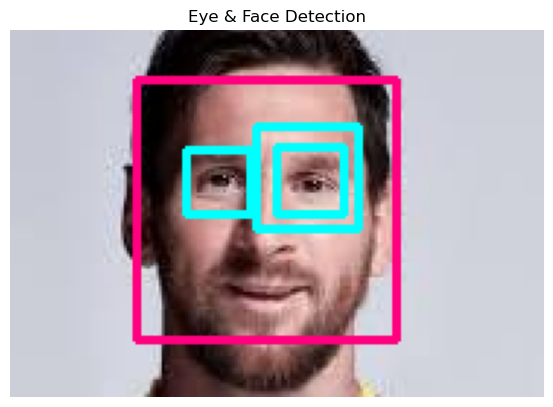

In [20]:
face_classifier = cv2.CascadeClassifier('haarcascades\Haarcascades\haarcascade_frontalface_default.xml')
eye_classifier = cv2.CascadeClassifier('haarcascades\Haarcascades\haarcascade_eye.xml')

faces = face_classifier.detectMultiScale(gray, 1.3, 5)

# When no faces detected, face_classifier returns and empty tuple
if len(faces) == 0:
    print('No faces found')

for (x,y,w,h) in faces:
    cv2.rectangle(image,(x,y),(x+w,y+h),(127,0,255),2)
    roi_gray = gray[y:y+h, x:x+w]
    roi_color = image[y:y+h, x:x+w]
    eyes = eye_classifier.detectMultiScale(roi_gray, 1.2, 3)
    for (ex,ey,ew,eh) in eyes:
        cv2.rectangle(roi_color,(ex,ey),(ex+ew,ey+eh),(255,255,0),2)

imshow('Eye & Face Detection',image)

### DETECT WITH WEBCAM 

In [ ]:

# Initialize the video capture
cap = cv2.VideoCapture(0)

# Load the face and eye cascade classifiers
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')
eye_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_eye.xml')

# Create a variable to track if the capture is active
capture_active = False

# Function to save the captured image
def save_image(frame):
    cv2.imwrite('captured_image.jpg', frame)
    print("Image saved!")

# Function to detect faces and eyes
def detect_faces_eyes(frame):
    gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
    faces = face_cascade.detectMultiScale(gray, 1.3, 5)
    
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        
        eyes = eye_cascade.detectMultiScale(roi_gray)
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color, (ex, ey), (ex+ew, ey+eh), (0, 255, 0), 2)
    
    return frame

# Function to handle button click events
def button_click(event, x, y, flags, param):
    global capture_active
    
    if event == cv2.EVENT_LBUTTONDOWN:
        if not capture_active:
            capture_active = True
            print("Capture started!")
        else:
            capture_active = False
            print("Capture stopped!")

# Create a window and bind the button click event
cv2.namedWindow('Capture')
cv2.setMouseCallback('Capture', button_click)

while True:
    ret, frame = cap.read()
    
    if ret:
        if capture_active:
            save_image(frame)
            frame = detect_faces_eyes(frame)
        
        cv2.imshow('Capture', frame)
        
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        break

# Release the video capture and close the window
cap.release()
cv2.destroyAllWindows()

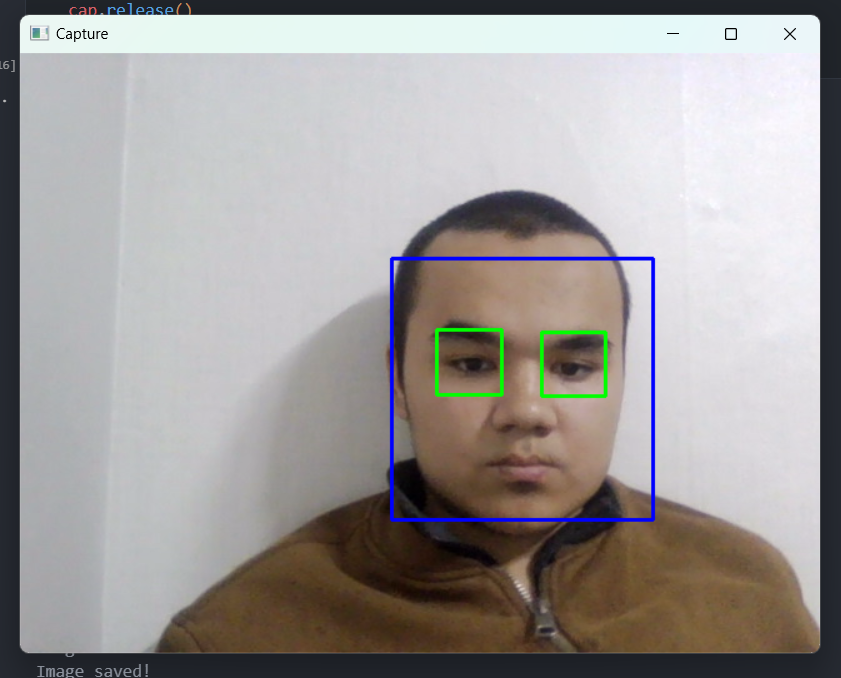

<video controls src="20240411-1123-52.9309883.mp4" title="Title"></video>